In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('penguins.csv')
df.sample(5)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
80,34.6,17.2,189.0,3200.0,FEMALE
23,38.2,18.1,185.0,3950.0,MALE
178,50.5,18.4,200.0,3400.0,FEMALE
304,44.9,13.8,212.0,4750.0,FEMALE
84,37.3,17.8,191.0,3350.0,FEMALE


In [5]:
df.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [6]:
df = df.dropna(how='all')
df.isnull().sum()


culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  7
dtype: int64

In [7]:
inputs=df
from sklearn.preprocessing import LabelEncoder
sex_encoder=LabelEncoder()
inputs['sex_n'] = sex_encoder.fit_transform(inputs['sex'])
inputs=inputs.drop("sex",axis=1)
inputs.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_n
0,39.1,18.7,181.0,3750.0,2
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,2


In [8]:
inputs = inputs.dropna(how='all')
inputs.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex_n                0
dtype: int64

In [12]:
inputs.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_n
count,342.000000,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386,1.532164
std,5.459584,1.974793,260.558057,801.954536,0.544625
min,32.100000,13.100000,-132.000000,2700.000000,0.000000
25%,39.225000,15.600000,190.000000,3550.000000,1.000000
50%,44.450000,17.300000,197.000000,4050.000000,2.000000
75%,48.500000,18.700000,213.750000,4750.000000,2.000000
max,59.600000,21.500000,5000.000000,6300.000000,3.000000


### Scaling data

In [15]:
def min_max(data):
    #min=np.min(data)
    #max=np.max(data)
    #scaled_data=((data-min) /(max-min))*9+1
    data=(((data-data.min())*9)/(data.max()-data.min()))+1
    return data

In [16]:
def z2(data):
    mean=np.mean(data)
    dev=np.std(data)
    scaled_data=(data-mean)/dev
    return scaled_data

In [17]:
inputs=min_max(inputs)
inputs.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_n
count,342.000000,342.000000,342.000000,342.000000,342.000000
mean,4.868995,5.340539,1.606807,4.754386,5.596491
std,1.786773,2.115850,0.456941,2.004886,1.633875
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.331818,3.678571,1.564692,3.125000,4.000000
50%,5.041818,5.500000,1.576968,4.375000,7.000000
75%,6.367273,7.000000,1.606343,6.125000,7.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [18]:
from sklearn.cluster import KMeans

In [19]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(inputs)
    wcss.append(km.inertia_)


In [20]:
wcss

[4967.445876002708,
 2748.2802257133912,
 1905.7701035135083,
 1369.658470396404,
 1035.6731465285427,
 958.159288381577,
 790.049074064772,
 751.952572281014,
 685.1984091387558,
 631.9688190205022]

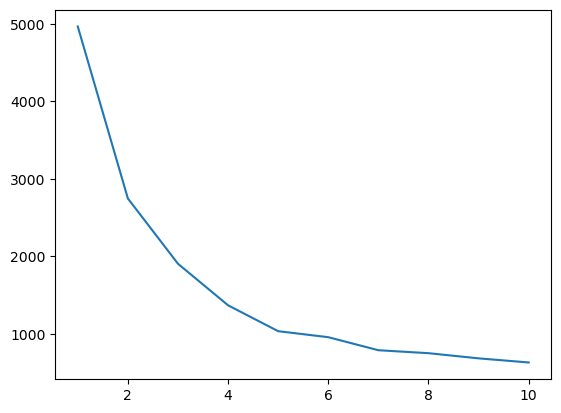

In [30]:
plt.plot(range(1,11),wcss)

In [31]:
x=inputs.iloc[:,:].values
km=KMeans(n_clusters=6)
y_means=km.fit_predict(x)

In [32]:
y_means

array([2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 4, 1, 2, 1,
       2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1,
       2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2,
       1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 4, 4,
       1, 4, 1, 1, 4, 4, 4, 1, 4, 1, 4, 1, 4, 4, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 4, 4, 1, 4, 1, 4, 1, 4, 4, 1, 4, 4, 1, 4, 4, 1, 4, 1, 4, 4, 4,
       4, 4, 4, 1, 4, 1, 4, 1, 4, 1, 4, 4, 1, 4, 1, 1, 4, 1, 4, 4, 4, 3,
       5, 3, 5, 0, 3, 3, 0, 3, 0, 3, 5, 3, 0, 3, 5, 3, 5, 3, 0, 0, 3, 3,
       0, 3, 0, 0, 0, 3, 5, 0, 3, 3, 5, 3, 5, 3, 0, 3, 0, 3, 5, 3, 0, 5,
       3, 3, 5, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 5, 3, 0, 3, 5, 3, 5, 0,
       5, 3, 5, 3, 0, 0, 3, 3, 5, 3, 5, 3, 5, 3, 5,

### PLOT

In [247]:
x=inputs.iloc[:,0:5]



In [253]:
from sklearn.model_selection import train_test_split

x_train,x_test=train_test_split(x,test_size=0.8,random_state=42)

In [255]:
x_train.shape

(68, 5)

In [257]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [259]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [261]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

In [263]:
x_train=pca.fit_transform(x_train)

In [265]:
x_train.shape

(68, 2)

In [267]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(x_train)
    wcss.append(km.inertia_)


In [269]:
wcss

[249.68881281772266,
 150.6169654808577,
 89.63782678764643,
 51.86234162809658,
 36.161982210979225,
 17.41884614035121,
 16.717157195169886,
 11.111648918818133,
 9.65282317519642,
 8.810969925353271]

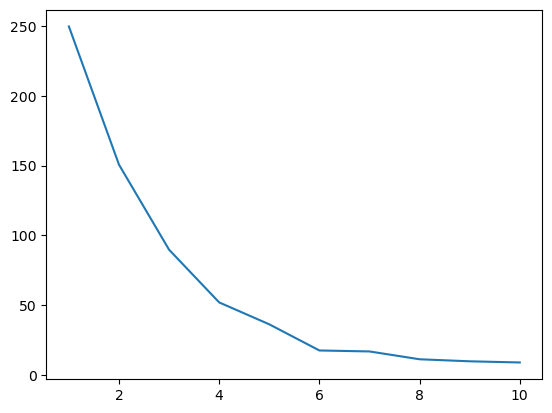

In [271]:
plt.plot(range(1,11),wcss)

In [273]:

km=KMeans(n_clusters=4)
y_means=km.fit_predict(x_train)

In [275]:
y_means

array([2, 3, 3, 0, 0, 0, 2, 0, 3, 3, 3, 1, 2, 0, 3, 3, 3, 3, 1, 3, 1, 2,
       3, 1, 0, 0, 1, 3, 0, 1, 2, 1, 2, 0, 1, 1, 1, 3, 0, 3, 3, 1, 1, 0,
       2, 3, 0, 1, 2, 1, 0, 0, 2, 3, 1, 3, 3, 1, 2, 2, 3, 2, 1, 2, 3, 1,
       2, 1])

### 4

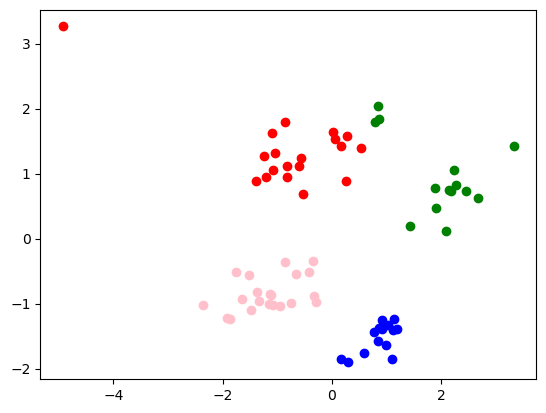

In [277]:
plt.scatter(x_train[y_means==0,0],x_train[y_means==0,1],color='blue')
#x and y coordinate of points in cluster 
plt.scatter(x_train[y_means==1,0],x_train[y_means==1,1],color='red')
plt.scatter(x_train[y_means==2,0],x_train[y_means==2,1],color='green')
plt.scatter(x_train[y_means==3,0],x_train[y_means==3,1],color='pink')


In [279]:
x_test=pca.fit_transform(x_test)
y_pred=km.predict(x_test)
y_pred

array([1, 3, 3, 1, 3, 3, 1, 3, 1, 3, 3, 1, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 1, 1, 3, 1, 3, 3, 3, 1, 3, 3, 1, 3, 1, 3, 3, 3, 1, 1,
       3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 3, 3, 1, 1, 1, 3, 1,
       3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 1, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 1,
       3, 1, 1, 1, 1, 3, 1, 1, 3, 1, 3, 1, 3, 3, 3, 3, 1, 1, 3, 1, 3, 1,
       3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 3, 1,
       1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 3, 3, 3, 3, 3, 1, 3, 1, 1, 3, 1, 3, 3, 3, 1, 3, 3, 1, 3, 1,
       1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 1, 1, 1,
       3, 3, 0, 1, 1, 3, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 1, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3,
       1, 2, 3, 3, 3, 3, 1, 1, 1, 1])

### 5

In [281]:
km=KMeans(n_clusters=5)
y_means=km.fit_predict(x_train)

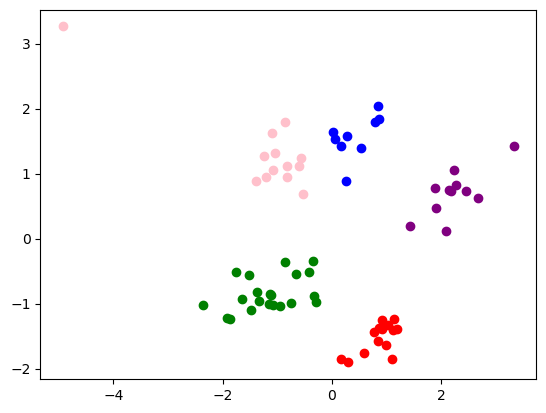

In [283]:
plt.scatter(x_train[y_means==0,0],x_train[y_means==0,1],color='blue')
#x and y coordinate of points in cluster 
plt.scatter(x_train[y_means==1,0],x_train[y_means==1,1],color='red')
plt.scatter(x_train[y_means==2,0],x_train[y_means==2,1],color='green')
plt.scatter(x_train[y_means==3,0],x_train[y_means==3,1],color='pink')
plt.scatter(x_train[y_means==4,0],x_train[y_means==4,1],color='purple')

### 3

In [285]:
km=KMeans(n_clusters=3)
y_means=km.fit_predict(x_train)

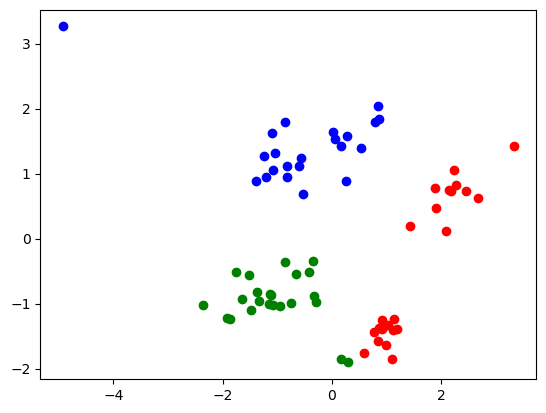

In [287]:
plt.scatter(x_train[y_means==0,0],x_train[y_means==0,1],color='blue')
#x and y coordinate of points in cluster 
plt.scatter(x_train[y_means==1,0],x_train[y_means==1,1],color='red')
plt.scatter(x_train[y_means==2,0],x_train[y_means==2,1],color='green')



### 6

In [289]:
km=KMeans(n_clusters=6)
y_means=km.fit_predict(x_train)

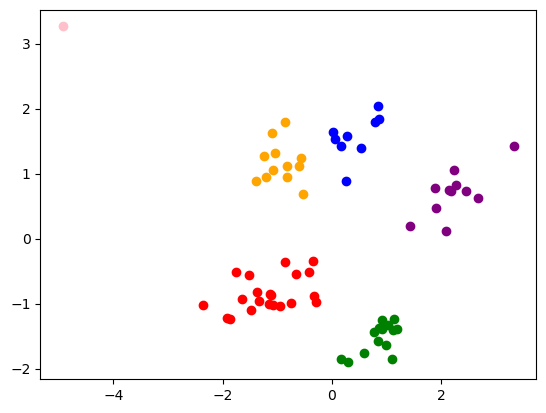

In [291]:
plt.scatter(x_train[y_means==0,0],x_train[y_means==0,1],color='blue')
#x and y coordinate of points in cluster 
plt.scatter(x_train[y_means==1,0],x_train[y_means==1,1],color='red')
plt.scatter(x_train[y_means==2,0],x_train[y_means==2,1],color='green')
plt.scatter(x_train[y_means==3,0],x_train[y_means==3,1],color='pink')
plt.scatter(x_train[y_means==4,0],x_train[y_means==4,1],color='purple')
plt.scatter(x_train[y_means==5,0],x_train[y_means==5,1],color='orange')